In [1]:
# 1) import Pandas and the dataset

import pandas as pd

# import chart libraries
import seaborn as sns
import matplotlib.pyplot as plt

# import df from csv
df = pd.read_csv('Survey_Data_Demographics.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Respondent                    11398 non-null  int64 
 1   MainBranch                    11398 non-null  object
 2   Hobbyist                      11398 non-null  object
 3   OpenSourcer                   11398 non-null  object
 4   OpenSource                    11317 non-null  object
 5   Employment                    11398 non-null  object
 6   Country                       11398 non-null  object
 7   Student                       11347 non-null  object
 8   EdLevel                       11286 non-null  object
 9   UndergradMajor                10661 non-null  object
 10  EduOther                      11234 non-null  object
 11  OrgSize                       11302 non-null  object
 12  DevType                       11333 non-null  object
 13  YearsCode       

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000


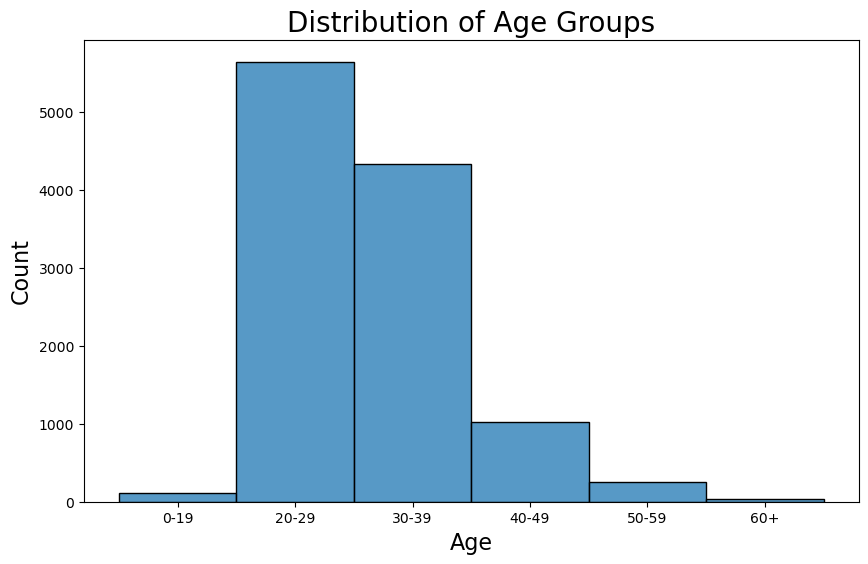

count    11398.000000
mean        30.759519
std          7.301116
min         16.000000
25%         26.000000
50%         29.000000
75%         34.000000
max         99.000000
Name: Age, dtype: float64

In [2]:
# 2) Analysis on the age of respondents in IT Sector

# Group the 'Age' column into age groups
bins = [0, 19, 29, 39, 49, 59, float('inf')]  # age
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']  # labels for age 

# Create a new column 'AgeGroup' that contains the age groups
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels=labels)

# Create a histplot to see the distribution of age groups
plt.figure(figsize=(10,6))
sns.histplot(data=df.AgeGroup)

# Add labels and title
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Age Groups', fontsize=20)

# show the graph
plt.show()

df.Age.describe()

WorkLoc
Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: count, dtype: int64


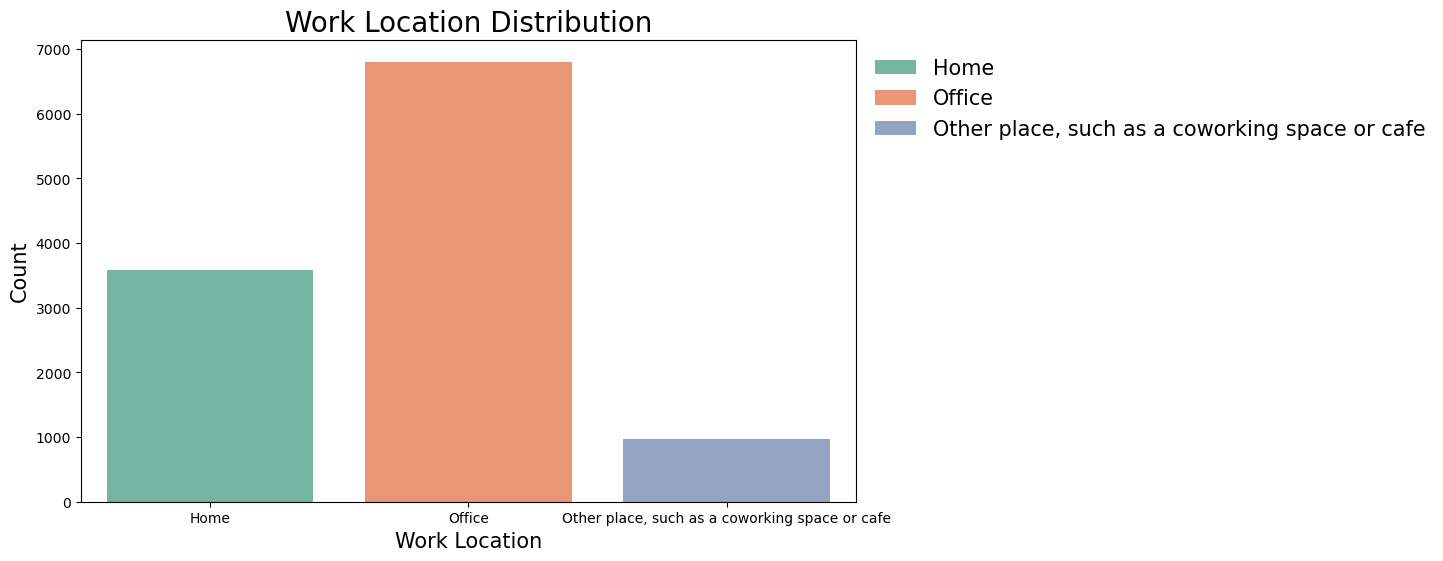

The the most frequent value is: Office


In [3]:
# 3) Analysis of Work Location Distribution

print(df.WorkLoc.value_counts())

# Create a vertical countplot for the 'WorkLoc' column

# create the countplot chart
plt.figure(figsize = (10, 6))
sns.countplot(data=df, x='WorkLoc', hue='WorkLoc',  palette='Set2')

# Add the legend outside the plot
plt.legend(loc = 'best', title_fontsize = 15,  fontsize = 15.0, frameon = False, bbox_to_anchor=(1,1))

# Set labels and title for the axes and plot
plt.xlabel('Work Location', fontsize=15.0)
plt.ylabel('Count', fontsize=15.0)
plt.title('Work Location Distribution', fontsize=20)

# show the graph
plt.show()

# (majority)
print("The the most frequent value is:", df.WorkLoc.value_counts().idxmax())

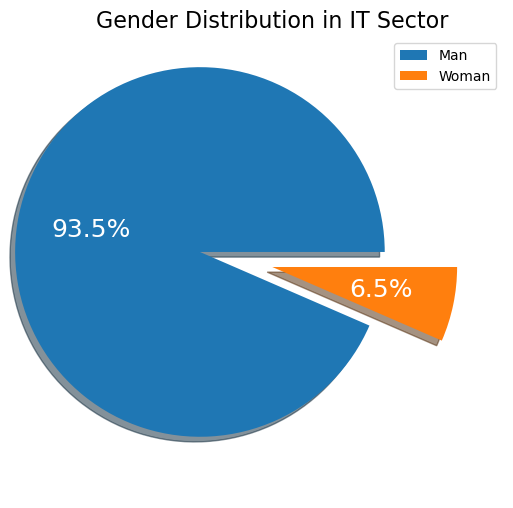

In [4]:
# 4) Analysis of Gender Distribution in IT Sector

# Filter the dataframe to include only 'Man' and 'Woman' in the 'Gender' column
df_gender = df[['Gender']][df.Gender.isin(['Man', 'Woman'])]

# Create the pie chart for the distribution of 'Gender' in the filtered dataset
plt.figure(figsize=(6, 6))
wedges = [0.4,0]
labels = ['Man', 'Woman']
plt.pie(df_gender.Gender.value_counts(), autopct= '%1.1f%%', textprops={'fontsize': 18, 'color': 'white'}, 
        explode = wedges, shadow = True)

# Add title and axis labels
plt.title("Gender Distribution in IT Sector", fontsize=16)
plt.legend(labels, frameon = True)

# Display the plot
plt.show()

In [5]:
# 5) Analysis of the correlation between the Age of respondents and their retribution, WorkWeekHrs and CodeRevHrs

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical columns
correlation_matrix = numerical_columns.corr()

# Get the correlation between 'Age' and all other numerical columns
age_correlation = correlation_matrix['Age']

# Display the results
print(age_correlation,'\n')
print("Conclusions:", "\n","\nWeak positive correlation between Age and ConvertedComp: This suggests that older individuals tend to earn slightly more, but the \nrelationship is not strong.","\n", "\nNo significant correlation with other variables: Age does not appear to directly influence factors such as weekly working hours \n(WorkWeekHrs), code review hours (CodeRevHrs), or normalized annual compensation.")

Respondent                      0.004146
CompTotal                       0.007368
ConvertedComp                   0.101851
WorkWeekHrs                     0.036667
CodeRevHrs                     -0.015916
Age                             1.000000
NormalizedAnnualCompensation   -0.004524
Name: Age, dtype: float64 

Conclusions: 
 
Weak positive correlation between Age and ConvertedComp: This suggests that older individuals tend to earn slightly more, but the 
relationship is not strong. 
 
No significant correlation with other variables: Age does not appear to directly influence factors such as weekly working hours 
(WorkWeekHrs), code review hours (CodeRevHrs), or normalized annual compensation.


In [6]:
# correletion between all numerical columns
numerical_columns.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,NormalizedAnnualCompensation
Respondent,1.000000,-0.012893,0.002468,-0.015087,0.003722,0.004146,0.000489
CompTotal,-0.012893,1.000000,0.002293,0.003460,0.006021,0.007368,0.863254
ConvertedComp,0.002468,0.002293,1.000000,0.020589,-0.029460,0.101851,0.013958
WorkWeekHrs,-0.015087,0.003460,0.020589,1.000000,0.024265,0.036667,0.005409
CodeRevHrs,0.003722,0.006021,-0.029460,0.024265,1.000000,-0.015916,0.010632
Age,0.004146,0.007368,0.101851,0.036667,-0.015916,1.000000,-0.004524
NormalizedAnnualCompensation,0.000489,0.863254,0.013958,0.005409,0.010632,-0.004524,1.000000
